<a href="https://colab.research.google.com/github/isabelaamatto/TCC-DSA/blob/main/TCC_DSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importando as bibliotecas que serão utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import requests
from matplotlib.backends.backend_pdf import PdfPages


**Bloco para carregar os arquivos**

In [ ]:
dengue_casos_por_ano = pd.read_csv('dengue_casos_por_ano.csv', sep=';', encoding='ISO-8859-1', engine='python', on_bad_lines='warn')
dengue_casos_por_ano.head()

,UF de notificação,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total
0,11 Rondônia,20,1994,2250,7916,2196,537,990,3957,2293,14260,10700,4991,52104
1,12 Acre,13,28464,6067,2252,1885,7337,10192,7731,15004,3518,7190,4309,93962
2,13 Amazonas,30,6318,3662,7516,3902,2322,3986,6052,8274,5359,6269,8065,61755
3,14 Roraima,10,1128,1110,210,284,111,1605,493,111,62,224,580,5928
4,15 Pará,21,4540,7853,10883,7827,3778,5395,3538,5078,5916,5688,19696,80213


In [ ]:
chikungunya_casos_por_ano = pd.read_csv('chikungunya_casos_por_ano.csv', sep=';', encoding='ISO-8859-1', engine='python', on_bad_lines='warn')
chikungunya_casos_por_ano.head()

,UF de notificação,2017,2018,2019,2020,2021,2022,2023,2024,Total
0,11 Rondônia,863,464,578,1077,433,544,984,1971,6914
1,12 Acre,363,640,151,274,667,222,304,623,3244
2,13 Amazonas,601,205,207,123,370,478,582,335,2901
3,14 Roraima,6760,508,514,151,341,447,504,529,9754
4,15 Pará,11869,12348,6275,1953,947,1625,2375,6304,43696


In [ ]:
zika_casos_por_ano = pd.read_csv('zika_casos_por_ano.csv', sep=';', encoding='ISO-8859-1', engine='python', on_bad_lines='warn')
zika_casos_por_ano.head()

,UF de notificação,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total
0,11 Rondônia,1881,516,271,441,588,294,315,496,2154,6956
1,12 Acre,1531,295,365,150,305,622,104,908,656,4936
2,13 Amazonas,6023,699,469,122,133,223,360,367,222,8618
3,14 Roraima,362,855,155,191,74,194,118,300,365,2614
4,15 Pará,6632,1456,808,402,440,252,578,460,728,11756


**Datawrangling**

In [ ]:
# removendo a coluna total - dengue
dengue_casos_por_ano.drop(columns=['Total'], inplace=True)
dengue_casos_por_ano.head()

,UF de notificação,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,11 Rondônia,20,1994,2250,7916,2196,537,990,3957,2293,14260,10700,4991
1,12 Acre,13,28464,6067,2252,1885,7337,10192,7731,15004,3518,7190,4309
2,13 Amazonas,30,6318,3662,7516,3902,2322,3986,6052,8274,5359,6269,8065
3,14 Roraima,10,1128,1110,210,284,111,1605,493,111,62,224,580
4,15 Pará,21,4540,7853,10883,7827,3778,5395,3538,5078,5916,5688,19696


In [ ]:
# removendo a coluna total - chikungunya
chikungunya_casos_por_ano.drop(columns=['Total'], inplace=True)
chikungunya_casos_por_ano.head()

,UF de notificação,2017,2018,2019,2020,2021,2022,2023,2024
0,11 Rondônia,863,464,578,1077,433,544,984,1971
1,12 Acre,363,640,151,274,667,222,304,623
2,13 Amazonas,601,205,207,123,370,478,582,335
3,14 Roraima,6760,508,514,151,341,447,504,529
4,15 Pará,11869,12348,6275,1953,947,1625,2375,6304


In [ ]:
# removendo a coluna total - zika
zika_casos_por_ano.drop(columns=['Total'], inplace=True)
zika_casos_por_ano.head()

,UF de notificação,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,11 Rondônia,1881,516,271,441,588,294,315,496,2154
1,12 Acre,1531,295,365,150,305,622,104,908,656
2,13 Amazonas,6023,699,469,122,133,223,360,367,222
3,14 Roraima,362,855,155,191,74,194,118,300,365
4,15 Pará,6632,1456,808,402,440,252,578,460,728


**Gráficos de linhas dos casos por ano de cada estado**

Dengue

In [ ]:
# gráfico de linhas demonstrando a quantidade de casos ao longo dos anos para cada estado
# Primeiras etapas
# Certifique-se de que a coluna 'UF de notificação' seja o índice do DataFrame
dengue_casos_por_ano.set_index('UF de notificação', inplace=True)

# Transpor o DataFrame para que os anos fiquem no eixo x
dengue_transposto = dengue_casos_por_ano.T
dengue_transposto.drop(columns=['Total'], inplace=True)

# Convertendo o índice (anos) para strings
dengue_transposto.index = dengue_transposto.index.astype(str)

# Convertendo os valores das colunas para numéricos
# Isso é necessário porque os valores podem ser interpretados como strings
for column in dengue_transposto.columns:
    dengue_transposto[column] = pd.to_numeric(dengue_transposto[column], errors='coerce')

In [ ]:
# Gerar cores únicas para cada estado
num_estados = len(dengue_transposto.columns)
colors = cm.get_cmap('tab20', num_estados)  # Escolhe o colormap 'tab20' com cores diferentes

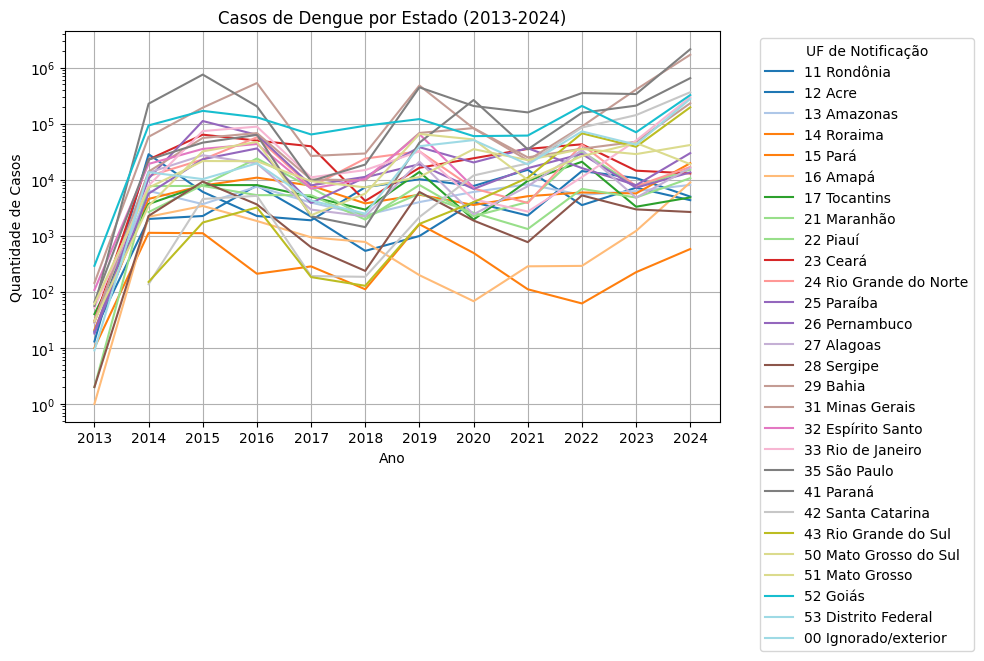

In [ ]:
# Plotando o gráfico
plt.figure(figsize=(10,6))
for i, estado in enumerate(dengue_transposto.columns):
    plt.plot(dengue_transposto.index, dengue_transposto[estado], label=estado, color=colors(i))

# Configurações do gráfico
plt.yscale('log')
plt.title('Casos de Dengue por Estado (2013-2024)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Casos')
plt.legend(title='UF de Notificação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Exibir o gráfico
plt.tight_layout()
plt.show()

Chikungunya

In [ ]:
# gráfico de linhas demonstrando a quantidade de casos ao longo dos anos para cada estado
# Primeiras etapas
# Certifique-se de que a coluna 'UF de notificação' seja o índice do DataFrame
chikungunya_casos_por_ano.set_index('UF de notificação', inplace=True)

# Transpor o DataFrame para que os anos fiquem no eixo x
chikungunya_transposto = chikungunya_casos_por_ano.T
chikungunya_transposto.drop(columns=['Total'], inplace=True)

# Convertendo o índice (anos) para strings
chikungunya_transposto.index = chikungunya_transposto.index.astype(str)

# Convertendo os valores das colunas para numéricos
# Isso é necessário porque os valores podem ser interpretados como strings
for column in chikungunya_transposto.columns:
    chikungunya_transposto[column] = pd.to_numeric(chikungunya_transposto[column], errors='coerce')

In [ ]:
# Gerar cores únicas para cada estado
num_estados = len(chikungunya_transposto.columns)
colors = cm.get_cmap('tab20', num_estados)  # Escolhe o colormap 'tab20' com cores diferentes

<ipython-input-16-7b54b056b48b>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', num_estados)  # Escolhe o colormap 'tab20' com cores diferentes


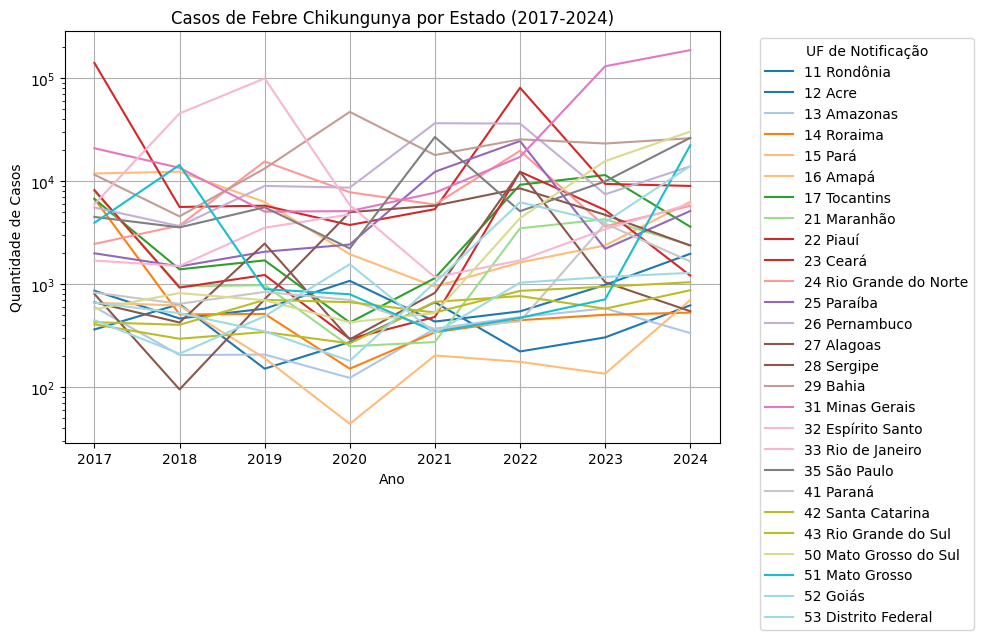

In [ ]:
# Plotando o gráfico
plt.figure(figsize=(10,6))
for i, estado in enumerate(chikungunya_transposto.columns):
    plt.plot(chikungunya_transposto.index, chikungunya_transposto[estado], label=estado, color=colors(i))

# Configurações do gráfico
plt.yscale('log')
plt.title('Casos de Febre Chikungunya por Estado (2017-2024)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Casos')
plt.legend(title='UF de Notificação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Exibir o gráfico
plt.tight_layout()
plt.show()

Zika

In [ ]:
# gráfico de linhas demonstrando a quantidade de casos ao longo dos anos para cada estado
# Primeiras etapas
# Certifique-se de que a coluna 'UF de notificação' seja o índice do DataFrame
zika_casos_por_ano.set_index('UF de notificação', inplace=True)

# Transpor o DataFrame para que os anos fiquem no eixo x
zika_transposto = zika_casos_por_ano.T
zika_transposto.drop(columns=['Total'], inplace=True)

# Convertendo o índice (anos) para strings
zika_transposto.index = zika_transposto.index.astype(str)

# Convertendo os valores das colunas para numéricos
# Isso é necessário porque os valores podem ser interpretados como strings
for column in zika_transposto.columns:
    zika_transposto[column] = pd.to_numeric(zika_transposto[column], errors='coerce')

In [ ]:
# Gerar cores únicas para cada estado
num_estados = len(zika_transposto.columns)
colors = cm.get_cmap('tab20', num_estados)  # Escolhe o colormap 'tab20' com cores diferentes

<ipython-input-20-3717a7d1235f>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', num_estados)  # Escolhe o colormap 'tab20' com cores diferentes


In [ ]:
# selecionando paleta de cores
palette = sns.color_palette("Set1", len(zika_transposto.columns))
# Plotando o gráfico
plt.figure(figsize=(10,6))
for i, estado in enumerate(zika_transposto.columns):
    plt.plot(zika_transposto.index, zika_transposto[estado], label=estado, color=palette(i))

# Configurações do gráfico
plt.yscale('log')
plt.title('Casos de Zika por Estado (2016-2024)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Casos')
plt.legend(title='UF de Notificação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Exibir o gráfico
plt.tight_layout()
plt.show()

TypeError: '_ColorPalette' object is not callable

<Figure size 1000x600 with 0 Axes>